<a href="https://colab.research.google.com/github/eglaMk/brai/blob/main/Copy_of_Brian_tumor_detection_%2204_04_2024%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The goal of the work**
Uplod two datasets,generate datasets, find the error and fix it, build and train the model and use it


## Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp '/content/drive/MyDrive/AI training /brain.zip' brain.zip

In [ ]:
ls

brain.zip  drive/  sample_data/


In [ ]:
!unzip brain.zip

Archive:  brain.zip
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2362).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2396).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2348).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2338).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2342).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2390).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2399).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2416).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2334).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2281).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2268).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2424).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2352).jpg  
  inflating: brain/Brain_Tumor/Brain_Tumor_Test/Cancer (2312).jpg  
  inflating: brain/Brain_Tum

In [ ]:
!rm -rf  Datasets

In [ ]:
# count the number of files in the dataset
!find "/content/brain/Brain_Tumor" -type f| wc -l

1613


In [ ]:
!find '/content/brain/Healthy/Healthy' -type f| wc -l

1387


##З Loading the necessary libraries and modules

In [ ]:
import os
import keras
from keras import layers
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D ,BatchNormalization
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


## Generate the Datasets

In [ ]:
!mkdir  Datasets

In [ ]:
!mkdir  Datasets/Training

In [ ]:
!mkdir  Datasets/Test

In [ ]:
!mv "/content/brain/Brain_Tumor/Brain_Tumor" /content/Datasets/Training

In [ ]:
!mv "/content/brain/Healthy/Healthy" /content/Datasets/Training

In [ ]:
!mv "/content/brain/Brain_Tumor/Brain_Tumor_Test" /content/Datasets/Test

In [ ]:
!mv "/content/brain/Healthy/Healthy_Test" /content/Datasets/Test

####Training and test datasets

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

image_size = (250, 250)
batch_size = 32

train_ds = image_dataset_from_directory(
    "/content/Datasets/Training",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = image_dataset_from_directory(
    "/content/Datasets/Training",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)


Found 1387 files belonging to 1 classes.
Using 1110 files for training.
Found 1387 files belonging to 1 classes.
Using 277 files for validation.


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


In [ ]:
class_names = train_ds.class_names
class_names

['Healthy']

###Image visualization

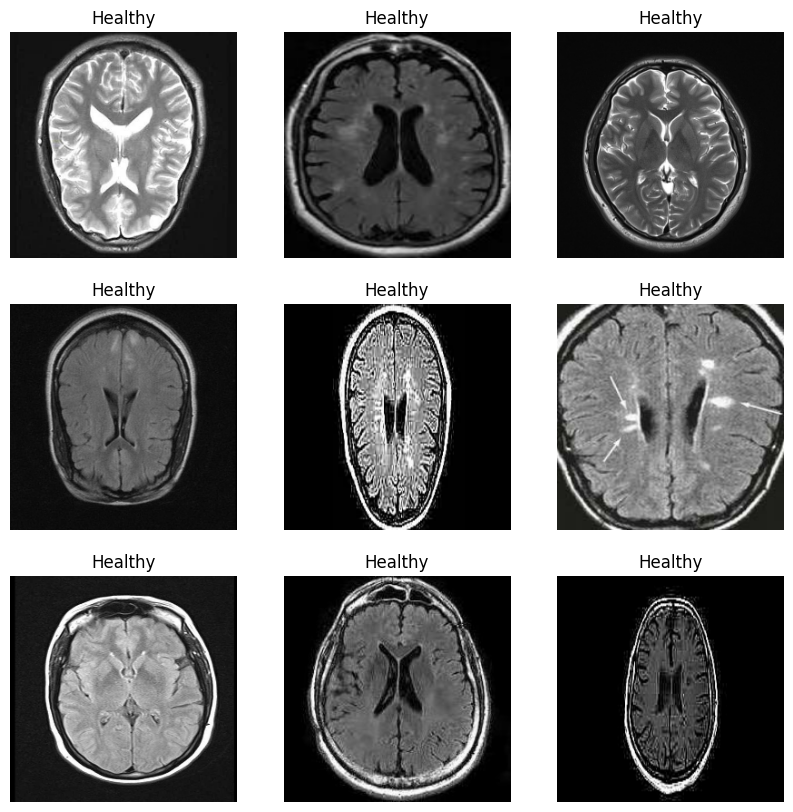

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

#### Test dataset

In [ ]:
test_ds = image_dataset_from_directory(
    "/content/Datasets/Test",
    image_size=image_size,
    batch_size=batch_size,
)

Found 322 files belonging to 2 classes.


In [ ]:
# Let's look at the class names
test_ds.class_names

['Brain_Tumor_Test', 'Healthy_Test']

In [ ]:
train_ds.class_names

['Healthy']



API tf.data

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
import tensorflow as tf
import os
import imageio

By using autotune, you allow TF to find the optimal buffer size:

.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

https://towardsdatascience.com/practical-coding-in-tensorflow-2-0-fafd2d3863f6

https://www.tensorflow.org/guide/data_performance#prefetching


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size = AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size = AUTOTUNE)

## Build a Model


In [ ]:
model = Sequential()
model.add(Conv2D(16, (5, 5), padding = 'same', activation='relu',
                 input_shape=(250, 250, 3)))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(32, (5, 5), padding = 'same', activation='relu'))#64
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (5, 5), padding = 'same', activation='relu')) #128
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu')) #64/ 128
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 250, 250, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2  (None, 125, 125, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 32)        0

In [ ]:
from tensorflow.keras import utils

In [ ]:
utils.plot_model(model, to_file='model_Spruce.png', show_shapes=True, show_layer_names=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rescale=1./255,validation_split = 0.2,zoom_range=(0.99,0.99),dtype=tf.float32)

In [ ]:
from keras import utils, callbacks
earlystopping = callbacks.EarlyStopping(monitor="val_loss", mode="min",
                                        patience=5, restore_best_weights = True)

In [ ]:
history = model.fit(train_ds,verbose=2,epochs=15,validation_data=(val_ds))

Epoch 1/15
35/35 - 37s - loss: 0.6542 - accuracy: 0.9703 - val_loss: 839.7525 - val_accuracy: 0.5000 - 37s/epoch - 1s/step
Epoch 2/15
35/35 - 36s - loss: 0.0504 - accuracy: 0.9991 - val_loss: 1178.0586 - val_accuracy: 0.5000 - 36s/epoch - 1s/step
Epoch 3/15
35/35 - 36s - loss: 0.0577 - accuracy: 0.9991 - val_loss: 1643.1471 - val_accuracy: 0.5000 - 36s/epoch - 1s/step
Epoch 4/15
35/35 - 36s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1769.0490 - val_accuracy: 0.5000 - 36s/epoch - 1s/step
Epoch 5/15
35/35 - 36s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1772.8977 - val_accuracy: 0.5000 - 36s/epoch - 1s/step
Epoch 6/15
35/35 - 36s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1773.0066 - val_accuracy: 0.5000 - 36s/epoch - 1s/step
Epoch 7/15
35/35 - 36s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1773.0078 - val_accuracy: 0.5000 - 36s/epoch - 1s/step
Epoch 8/15
35/35 - 36s - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 1773.0079 - val_accuracy: 0.5000 - 36s/epoch

## Train the model

####

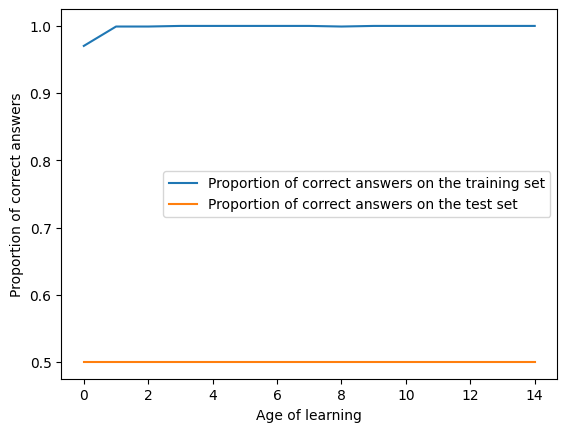

In [ ]:
plt.plot(history.history['accuracy'],
         label='Proportion of correct answers on the training set')
plt.plot(history.history['val_accuracy'],
         label='Proportion of correct answers on the test set')
plt.xlabel('Age of learning')
plt.ylabel('Proportion of correct answers')
plt.legend()
plt.show()

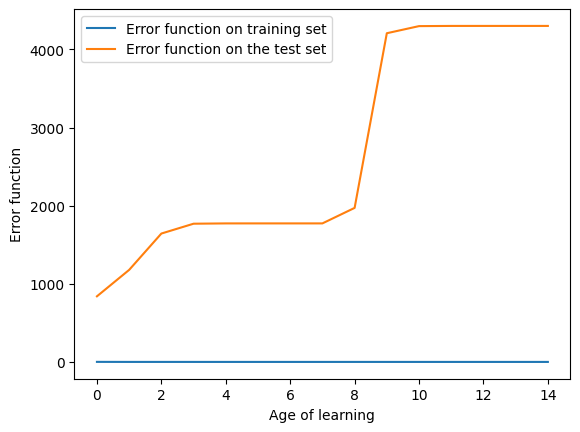

In [ ]:
plt.plot(history.history['loss'],
         label='Error function on training set')
plt.plot(history.history['val_loss'],
         label='Error function on the test set')
plt.xlabel('Age of learning')
plt.ylabel('Error function')
plt.legend()
plt.show()

## Evaluate the quality of training the model - the evaluate method


In [ ]:
scores = model.evaluate(test_ds, verbose=1)

11/11 [==============================] - 1s 110ms/step - loss: 4300.5806 - accuracy: 0.5000


In [ ]:
scores

[4300.58056640625, 0.5]

In [ ]:
print(f'Proportion of correct answers on test data= {round(scores[1]*100, 2)} %')

Proportion of correct answers on test data= 50.0 %


#

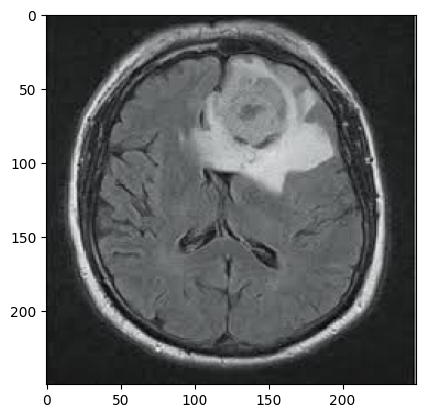

In [ ]:
from keras.preprocessing import image

filename = '//content/Datasets/Test/Brain_Tumor_Test/Cancer (2266).jpg'
img = image.load_img(filename, target_size=(250, 250))
plt.imshow(img)
plt.show()


In [ ]:

x=image.img_to_array(img)

In [ ]:
x.shape

(250, 250, 3)

In [ ]:
x=x.reshape(1, 250, 250, 3)
x=255-x
x/=255

In [ ]:
prediction = model.predict(x)
print('\033[91m', "Perhaps it", class_names[np.argmax(prediction)]) # ANSI escape code (color management), finding the maximum in the sequence 'prediction'

1/1 [==============================] - 0s 41ms/step
 Perhaps it Healthy


# Output of  multiple predictions


i: 0, labels[i]: 1, len(class_names): 1
1/1 [==============================] - 0s 39ms/step
i: 1, labels[i]: 0, len(class_names): 1
1/1 [==============================] - 0s 39ms/step
i: 2, labels[i]: 1, len(class_names): 1
1/1 [==============================] - 0s 39ms/step
i: 3, labels[i]: 1, len(class_names): 1
1/1 [==============================] - 0s 40ms/step
i: 4, labels[i]: 0, len(class_names): 1
1/1 [==============================] - 0s 40ms/step
i: 5, labels[i]: 0, len(class_names): 1
1/1 [==============================] - 0s 39ms/step
i: 6, labels[i]: 0, len(class_names): 1
1/1 [==============================] - 0s 39ms/step
i: 7, labels[i]: 1, len(class_names): 1
1/1 [==============================] - 0s 39ms/step
i: 8, labels[i]: 1, len(class_names): 1
1/1 [==============================] - 0s 40ms/step


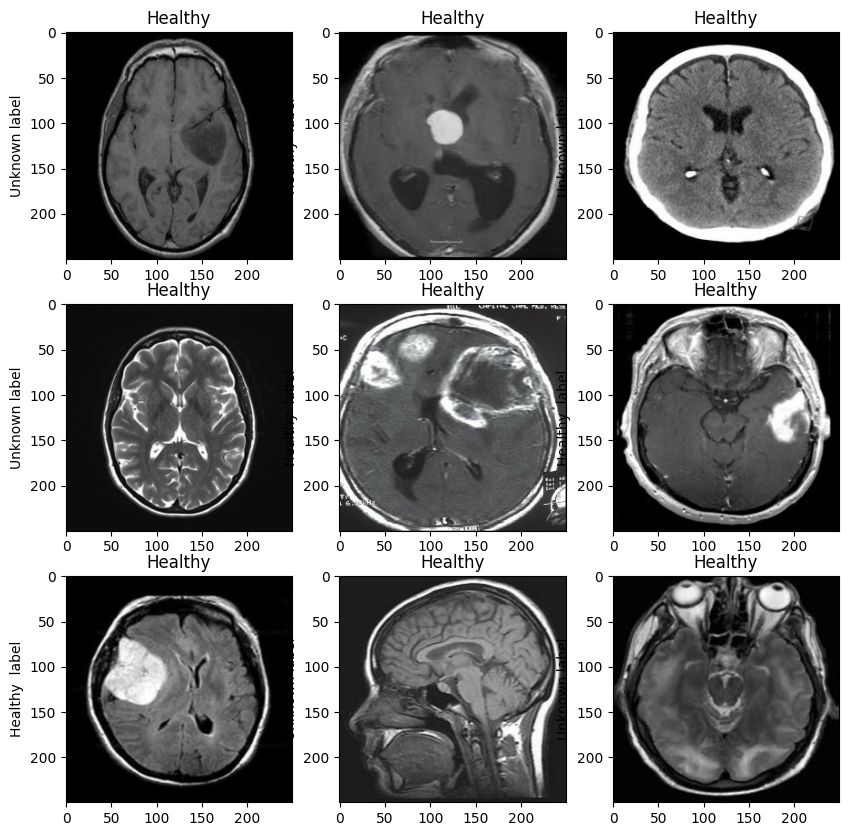

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Debugging output
        print(f"i: {i}, labels[i]: {labels[i]}, len(class_names): {len(class_names)}")

        # Check if the index is within range before accessing class_names
        if labels[i] < len(class_names):
            plt.ylabel(class_names[labels[i]] + '  label')
        else:
            plt.ylabel('Unknown label')

        x = image.img_to_array(images[i])
        x = x.reshape(1, 250, 250, 3)
        prediction = model.predict(x)
        plt.title(class_names[np.argmax(prediction)])

plt.show()


# **Conclusion**
We build a neural network, find and error and fix it and succesfuly used it.